In [94]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.colors as colors

from matplotlib import rc

rc('text', usetex=False)
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
rc('mathtext', **{'fontset': 'cm'})

In [95]:
def mySPDFplot(xdat, ydat, ax):
    #equil = 2./3.
    equil = 1./2.
    #ax.set_facecolor('#e6e6e6')
    ax.plot(xdat, ydat, color = 'k')
    ax.plot(xdat, np.ones(len(xdat))*equil, color = 'k', ls = '--', alpha = 0.5)
    ax.set_xlim([xdat.min(), xdat.max()])
    #ax.set_ylim([0, 1])
    ax.set_ylim([.3, .7])
    #ax.set_ylim([ydat.min(), ydat.max()])
    #ax.grid(ls = '--')
    ax.tick_params(labelsize = 25)
    ax.set_xlabel(r"Time ($1/J$)", fontsize = 30)
    ax.set_ylabel("SPDF", fontsize = 30)
    
def myplot(xdat, ydat, ax):
    ax.set_facecolor('#e6e6e6')
    ax.plot(xdat, ydat, color = 'k', label = "Two-site model")
    ax.grid(ls = '--')
    ax.tick_params(labelsize = 15)

In [96]:
def omega(J, u):
    return np.sqrt(9*J**2 + 4*J*u + 4*u**2)
    
def PV(J, u):
    return 16*J*u/(3*omega(J, u)**2)

def PV2(J, u):
    """Peak-valley amplitude for oscillation caused by relevant fraction of rotated state"""
    return 2*J*u/omega(J, u)**2

def spdf(t, J, u):
    """SPDF at time t for Heisenberg parameters J & u"""
    #return 2/3 + PV(J, u) * np.sin(omega(J, u) * t / 2)**2
    return 1/2 + PV2(J, u) * np.sin(omega(J, u) * t / 2)**2

## Two-site overview figure

In [97]:
def bloch(ax):
    # Make data
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot the surface
    ax.plot_surface(x, y, z, color='gray', alpha = 0.05)
    ax.axis('off')

    hei = np.linspace(-1, 1, 7)
    for h in hei:
        r = np.sqrt(1 - h**2)
        if h == 0:
            ax.plot(r*np.cos(u), r*np.sin(u), h*np.ones(len(u)), color = 'k', alpha = 0.1)
        else:
            ax.plot(r*np.cos(u), r*np.sin(u), h*np.ones(len(u)), color = 'k', alpha = 0.1)

    azu = np.linspace(0, np.pi, 8)
    for a in azu:
        if a == 0:
            ax.plot(np.sin(a) * np.cos(u), np.cos(a) * np.cos(u), np.sin(u), color = 'k', alpha = 0.1)
        else:
            ax.plot(np.sin(a) * np.cos(u), np.cos(a) * np.cos(u), np.sin(u), color = 'k', alpha = 0.1)
    
    ax.plot(np.linspace(-1, 1, 10), np.zeros(10), np.zeros(10), color = 'k', alpha = 0.5)
    ax.plot(np.zeros(10), np.linspace(-1, 1, 10), np.zeros(10), color = 'k', alpha = 0.5)
    ax.plot(np.zeros(10), np.zeros(10), np.linspace(-1, 1, 10), color = 'k', alpha = 0.5)

    ax.text(0, 0, 1.2, r"$|0, 0\rangle$", fontsize = 30, horizontalalignment = 'center')
    ax.text(0, 0, -1.3, r"$\left(|1,-1\rangle + |-1, 1|\right) / \sqrt{2}$", fontsize = 30, horizontalalignment = 'center')
    ax.text(0, -1.2, 0, r"$\hat{x}$", fontsize = 30)
    ax.text(1.12, 0, 0, r"$\hat{y}$", fontsize = 30)
    
    # Make sphere appear larger:
    ax.dist = 6.5

In [105]:
mr = "#FF8080"
mb = "#2424B2"

def draw_double_well(ax, doublonType):
    ax.axis('off')
    xd = np.linspace(0, 2*np.pi, 1000)
    yd = np.cos(xd)**2
    ax.plot(xd, yd, color = 'k')
    xpos_1st = 1
    xpos_2nd = 3
    if doublonType == 'AABB':
        ax.scatter(np.array([1, 1]) * xpos_1st*np.pi/2, [0.45, 0.85], s = 75, color = mb)
        ax.scatter(np.array([1, 1]) * xpos_2nd*np.pi/2, [0.45, 0.85], s = 75, color = mr)
    elif doublonType == 'BBAA':
        ax.scatter(np.array([1, 1]) * xpos_1st*np.pi/2, [0.45, 0.85], s = 75, color = mr)
        ax.scatter(np.array([1, 1]) * xpos_2nd*np.pi/2, [0.45, 0.85], s = 75, color = mb)
    elif doublonType == 'ABAB':
        ax.scatter(np.array([1]) * xpos_1st*np.pi/2, [0.45], s = 75, color = mb)
        ax.scatter(np.array([1]) * xpos_1st*np.pi/2, [0.85], s = 75, color = mr)
        ax.scatter(np.array([1]) * xpos_2nd*np.pi/2, [0.45], s = 75, color = mb)
        ax.scatter(np.array([1]) * xpos_2nd*np.pi/2, [0.85], s = 75, color = mr)

def bloch(ax):
    # Make data
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot the surface
    ax.plot_surface(x, y, z, color='gray', alpha = 0.05)
    ax.axis('off')

    hei = np.linspace(-1, 1, 7)
    for h in hei:
        r = np.sqrt(1 - h**2)
        if h == 0:
            ax.plot(r*np.cos(u), r*np.sin(u), h*np.ones(len(u)), color = 'k', alpha = 0.1)
        else:
            ax.plot(r*np.cos(u), r*np.sin(u), h*np.ones(len(u)), color = 'k', alpha = 0.1)

    azu = np.linspace(0, np.pi, 8)
    for a in azu:
        if a == 0:
            ax.plot(np.sin(a) * np.cos(u), np.cos(a) * np.cos(u), np.sin(u), color = 'k', alpha = 0.1)
        else:
            ax.plot(np.sin(a) * np.cos(u), np.cos(a) * np.cos(u), np.sin(u), color = 'k', alpha = 0.1)
    
    ax.plot(np.linspace(-1, 1, 10), np.zeros(10), np.zeros(10), color = 'k', alpha = 0.5)
    ax.plot(np.zeros(10), np.linspace(-1, 1, 10), np.zeros(10), color = 'k', alpha = 0.5)
    ax.plot(np.zeros(10), np.zeros(10), np.linspace(-1, 1, 10), color = 'k', alpha = 0.5)

    
    lower_offset_h = 0.09
    lower_offset_v = 0.02
    top_offset_v = -0.02
    axin1 = ax.inset_axes([0.28 - lower_offset_h, 0.03 - lower_offset_v, 0.2, 0.1])
    draw_double_well(axin1, 'AABB')
    axin2 = ax.inset_axes([0.54 - lower_offset_h, 0.03 - lower_offset_v, 0.2, 0.1])
    draw_double_well(axin2, 'BBAA')
    axin3 = ax.inset_axes([0.415, 0.9 - top_offset_v, 0.2, 0.1])
    draw_double_well(axin3, 'ABAB')
    
    ax.text2D(0.51 - lower_offset_h, 0.055 - lower_offset_v, r"$+$", fontsize = 35, horizontalalignment = 'center', transform = ax.transAxes)
    ax.text2D(0.255 - lower_offset_h, 0.055 - lower_offset_v, r"$($", fontsize = 35, transform=ax.transAxes)
    ax.text2D(0.74 - lower_offset_h, 0.055 - lower_offset_v, r"$)/\sqrt{2}$", fontsize = 35, transform = ax.transAxes)

    ax.text(0, -1.2, 0, r"$\hat{x}$", fontsize = 30)
    ax.text(1.12, 0, 0, r"$\hat{y}$", fontsize = 30)
    
    # Make sphere appear larger:
    ax.dist = 6.5

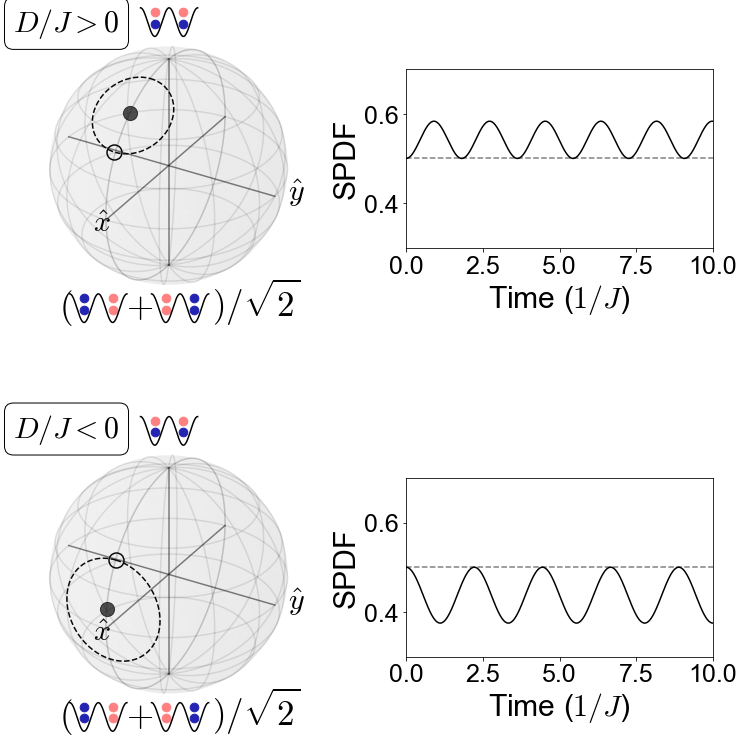

In [108]:
fwidth = 13*0.8
fheight = 12*1.1*0.8
fig = plt.figure(figsize = (fwidth, fheight))

spec = fig.add_gridspec(ncols=2, nrows=8, width_ratios = [1., 1.])
ax = fig.add_subplot(spec[0:4, 0], projection = '3d')

# Make data for later
u = np.linspace(0, 2 * np.pi, 100)

# Add bloch sphere to ax
bloch(ax)
#ax.set_box_aspect([1,1,1])
ax.set_box_aspect(1.0)

# Add annotation
bbox_props = dict(boxstyle="round,pad=0.3", fc = "white", ec = "k", alpha = 1.0, lw=1)
ax.annotate(r'$D/J > 0$',
            xy=(0.02, 1.02), xycoords='axes fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=30, bbox = bbox_props)

# Place rotated eigenstate position on sphere
ab = np.sqrt(15/24)
ax.scatter(0, -np.sqrt(1 - ab**2), ab, s = 200, color = 'k', alpha = 0.7)

# Add circle describing precession trajectory
ypos = 0.94
r = np.sqrt(1 - ypos**2)
theta = -0.92
rotmatx = np.array([[1, 0, 0], [0, np.cos(theta), -np.sin(theta)], [0, np.sin(theta), np.cos(theta)]])
X = r*np.sin(u)
Y = -ypos*np.ones(len(u))
Z = r*np.cos(u)
coords = np.array([np.dot(rotmatx, np.array([X[i], Y[i], Z[i]])) for i in range(len(u))])
ax.plot(coords[:, 0], coords[:, 1], coords[:, 2], color = 'k', ls = '--')

# Add original eigenstate
ax.plot(np.array([coords[50, 0]]), np.array([coords[50, 1]]), np.array([coords[50, 2]]), \
        marker = 'o', lw = 0, fillstyle = 'none', markersize = 15, color = 'k', markeredgewidth = 1.5)

# Second bloch sphere plot
ax = fig.add_subplot(spec[4:, 0], projection = '3d')
bloch(ax)
#ax.set_box_aspect([1,1,1])
ax.set_box_aspect(1.0)

# Add annotation
ax.annotate(r'$D/J < 0$',
            xy=(0.02, 1.03), xycoords='axes fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=30, bbox = bbox_props)

# Place rotated eigenstate position on sphere
ax.scatter(0, -np.sqrt(31/32), np.sqrt(1/32), s = 200, color = 'k', alpha = 0.7)

# Add circle describing precession trajectory
ypos = 0.9
r = np.sqrt(1 - ypos**2)
theta = -0.13
rotmatx = np.array([[1, 0, 0], [0, np.cos(theta), -np.sin(theta)], [0, np.sin(theta), np.cos(theta)]])
X = r*np.sin(u)
Y = -ypos*np.ones(len(u))
Z = r*np.cos(u)
coords = np.array([np.dot(rotmatx, np.array([X[i], Y[i], Z[i]])) for i in range(len(u))])
ax.plot(coords[:, 0], coords[:, 1], coords[:, 2], color = 'k', ls = '--')

# Add original eigenstate
ax.plot(np.array([coords[0, 0]]), np.array([coords[0, 1]]), np.array([coords[0, 2]]), \
        marker = 'o', lw = 0, fillstyle = 'none', markersize = 15, color = 'k', markeredgewidth = 1.5)

# Create plots with oscillating SPDFs
ax3 = fig.add_subplot(spec[1:3, 1])
xdum = np.linspace(0, 10, 1000)
ydum = spdf(xdum, 1, 0.5)
mySPDFplot(xdum, ydum, ax3)

ax4 = fig.add_subplot(spec[5:7, 1])
xdum = np.linspace(0, 10, 1000)
ydum = spdf(xdum, 1, -0.5)
mySPDFplot(xdum, ydum, ax4)

# # Add some more rectangles to group things together more
# box_x0 = 0.02
# box_y0 = 0.02
# box_width = 0.955
# box_height = 0.45
# splitting = 0.065
# box1 = mpatches.FancyBboxPatch([box_x0, box_y0], box_width, box_height - 0.02, 
#                     boxstyle=mpatches.BoxStyle("Round", pad=0.02),
#                     fc = "gray", alpha = 0.06, lw = 2, ec = 'none',
#                     transform=fig.transFigure, figure=fig)

# box2 = mpatches.FancyBboxPatch([box_x0, box_y0+box_height+splitting], box_width, box_height, 
#                     boxstyle=mpatches.BoxStyle("Round", pad=0.02),
#                     fc = "gray", alpha = 0.06, lw = 2, ec = 'none',
#                     transform=fig.transFigure, figure=fig)


# fig.patches.extend([box1, box2])

plt.tight_layout()

# Fine tune axes positions
apos = ax3.get_position()
ax3.set_position([apos.x0, apos.y0 - 0.02, apos.width - 0.01, apos.height + 0.07])

apos = ax4.get_position()
ax4.set_position([apos.x0, apos.y0 - 0.02, apos.width - 0.01, apos.height + 0.07])

fig.savefig("two-site-heisenberg-min-graphical.pdf")
plt.show()

The open circle represents the eigenstate which we prepare if $u = 0$. If $u \neq 0$ the position of the eigenstate shifts (solid circle), and the intial state will start to precess around it. For $u >0 $ (top row) this precession will result in an increase in SPDF, for $u < 0$ (bottom row) the SPDF will dip down. We can think of $u$ as if it were a $z$ field.

The solution for the SPDF in the two-site model is analytically given by
$$
    SPDF = \frac{2}{3} + PV \sin\left( \Omega t/2 \right)^2,
$$
where $\Omega = \sqrt{9J^2 + 4Ju + 4u^2}$ is the oscillation frequency, and where the peak-to-valley amplitude of the oscillation is given by $PV = \frac{16Ju}{3\Omega^2}$. Using this, we can parametrize the initial acceleration by fitting to $y = at^2$ for small $t$. Doing this, we find that

$$
    a = \frac{P \Omega^2}{4}.
$$

In the figure above we compare this quantity to the $a$ coefficient that we obtain by fitting to the first few points in the MPS evolution.

## Three-site model, and realistic SPDFs for the superposition state

Above, we used an eigenstate of the idealized two-level system. This assumes that all population is in the states that contribute to the oscillations. This is not realistic. If we were to prepare the superposition state on two sites, for instance, a fraction of 3/8 of the total population would be in the states that contribute to the oscillation. This would be on top of a background SPDF of 1/2. Taking all this into account, we can make a better comparison between the analytical two-site model, the three-site model (solved using numerical integration), and the many-site model (solved using MPS methods). 

In [15]:
threeSitesDat = np.loadtxt("three_site_ampl_accel_vs_u.csv", delimiter = ",", skiprows = 1)

(-10.0, 10.0)

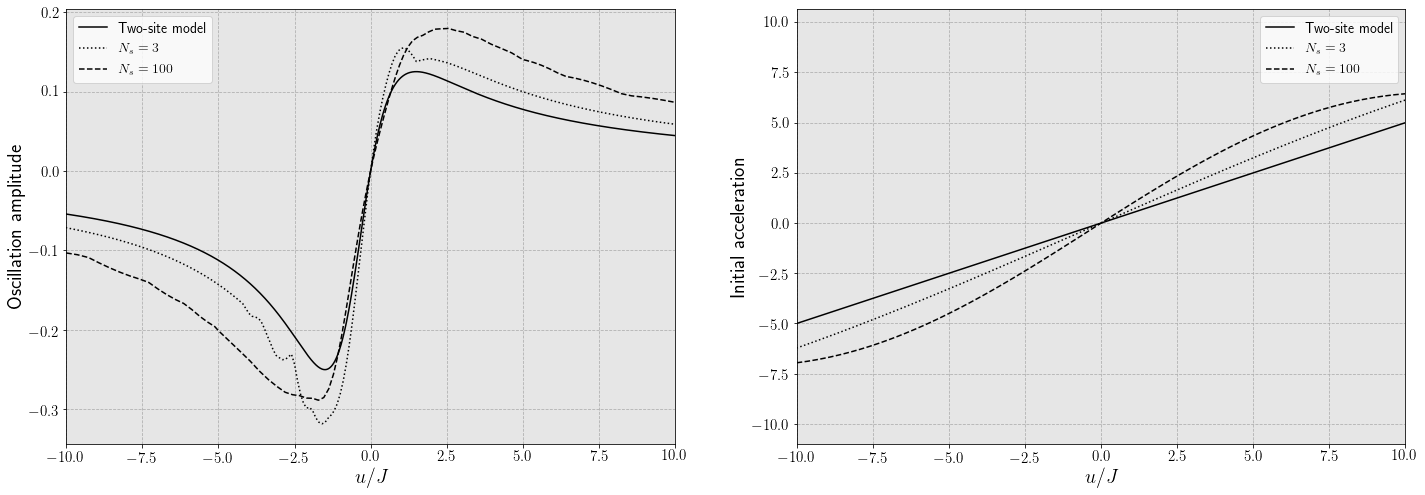

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (24, 8))

# Creteate plots with frequency and amplitude info
xdum = np.linspace(-10, 10, 1000)
ydum = PV2(1, xdum)
myplot(xdum, ydum, ax[0])
ax[0].set_xlabel(r"$u/J$", fontsize = 20)
ax[0].set_ylabel("Oscillation amplitude", fontsize = 20)

ax[0].plot(threeSitesDat[:, 0], threeSitesDat[:, 1], label = r"$N_s = 3$", ls = ':', c = 'k')

# Plot numerical result for long chain
rawdat = np.load("heisenberg-chain-oscillation-amplitude.npz")
us, amp = [rawdat[x] for x in rawdat]
ax[0].plot(us, amp, ls = '--', color = 'k', label = r"$N_s = 100$")
ax[0].legend(fontsize = 14)
ax[0].set_xlim([-10, 10])

ydum = PV2(1, xdum) * omega(1, xdum)**2 / 4
myplot(xdum, ydum, ax[1])
rawdat = np.load("heisenberg-chain-oscillation-frequency.npz")
us, osc_freq = [rawdat[x] for x in rawdat]
ax[1].plot(threeSitesDat[:, 0], threeSitesDat[:, 2], label = r"$N_s = 3$", ls = ':', c = 'k')
ax[1].plot(us, osc_freq, ls = '--', color = 'k', label = r"$N_s = 100$")
ax[1].set_xlabel(r"$u/J$", fontsize = 20)
ax[1].set_ylabel("Initial acceleration", fontsize = 20)
ax[1].legend(fontsize = 14)
ax[1].set_xlim([-10, 10])

## Dynamics of two-site model with realistic superposition

In [10]:
rawdat = np.load("../TEBD Experiments/generic-lattice-parameters.npz")
V0_Er, tunneling, Us = [rawdat[x] for x in rawdat]

In [11]:
aAA = (100.4 + 100.867) / 2
aAB = 100.4

UAA = Us * aAA / 100.
UAB = Us * aAB / 100.

u_Hz = UAA - UAB
J_Hz = 4*tunneling**2 / UAB

In [19]:
def spdfs(t, J, u):
    return 0.5 + PV2(J, u) * np.sin( np.pi * omega(J, u) * t )**2

In [90]:
tdum = np.linspace(0, 0.3, 1000)
spdf_ar = np.array([np.zeros(len(tdum))])

for i in range(len(V0_Er)):
    spdf_ar = np.append(spdf_ar, [spdfs( tdum, J_Hz[i], u_Hz[i] )], axis = 0)

spdf_ar = np.delete(spdf_ar, 0, axis = 0)

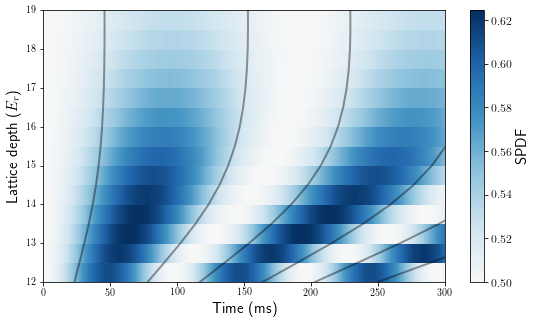

In [110]:
fig, ax = plt.subplots(figsize = (9, 5))

divnorm = colors.TwoSlopeNorm(vcenter = 0.5)
X, Y = np.meshgrid(1e3 * tdum, V0_Er)
im = ax.pcolor(X, Y, spdf_ar, cmap = "RdBu", norm = divnorm)
ax.set_xlabel("Time (ms)", fontsize = 15)
ax.set_ylabel(r"Lattice depth ($E_r$)", fontsize = 15)
ax.set_xlim([0, 300])
ax.set_ylim([12, 19])

cbar = plt.colorbar(im, ax = ax)
cbar.set_label("SPDF", fontsize = 15)
cbar.ax.tick_params(labelsize = 12)

for scale in np.array([1.5, 5, 7.5, 10.5, 13, 16]):
    ax.plot(scale * 1e3/(2*np.pi * omega(J_Hz, u_Hz)), V0_Er, color = "k", alpha = 0.4, lw = 2)
    